In [1]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import convolve, hann, hamming, blackman, gaussian
from scipy.fft import fftshift
import soundfile as sf
import math

#Birds Recording
fs, data = wavfile.read("/Users/kevinbrennan/Desktop/Final_Project/Music-Technology-Final-Project/LFOs/Birds.wav")


# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.8307774066925049
Max Value: 0.9998999834060669


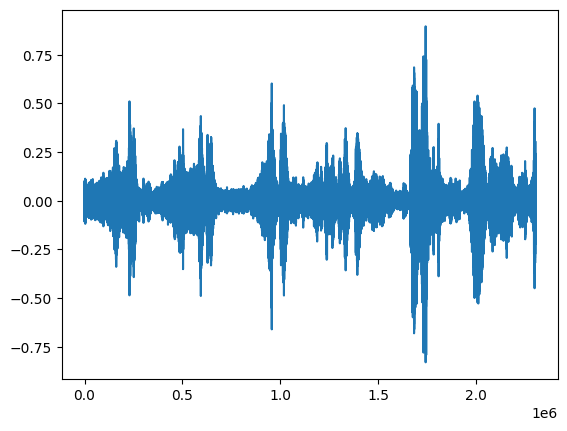

In [2]:
plt.plot(data[:, 0])

In [7]:
sd.play(data,fs)

# Envelope following


In [3]:
lfo = np.zeros(len(data))

for i in range(len(data)):
    lfo[i] = np.abs(data[i, 0])

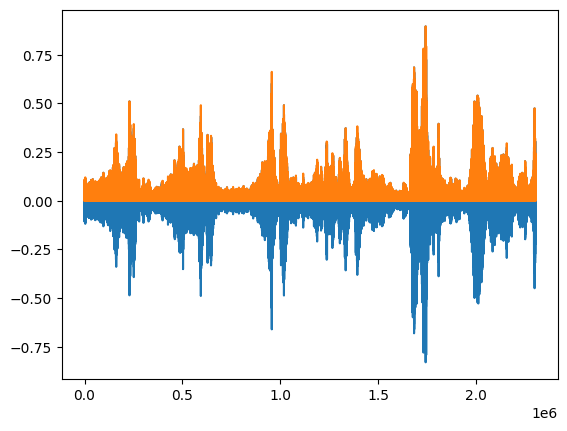

In [4]:
plt.plot(data[:, 0])
plt.plot(lfo)

# Moving average filter to smooth out signal

In [5]:
lfo_movingAvg = np.zeros(len(data))

M = 14400

kernel = np.ones(2 * M + 1) / (2 * M + 1)

smoothed_lfo = convolve(np.abs(data[:, 0]), kernel, mode='same')

lfo_movingAvg = 2 * (smoothed_lfo - np.min(smoothed_lfo)) / np.ptp(smoothed_lfo) - 1


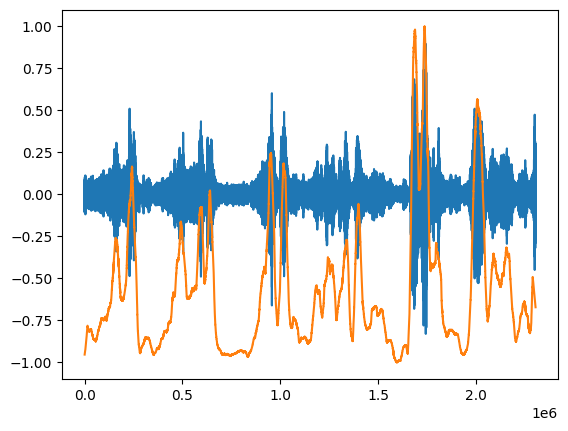

In [6]:
plt.plot(data[:, 0])
plt.plot(lfo_movingAvg) 

# Making the signal more of an LFO/

In [50]:
thresh_high = 0.25
thresh_low = -1

lfo_movingAvg[lfo_movingAvg > thresh_high] = thresh_high - (lfo_movingAvg[lfo_movingAvg > thresh_high] - thresh_high)

lfo_movingAvg = 2 * (lfo_movingAvg - np.min(lfo_movingAvg)) / np.ptp(lfo_movingAvg) - 1

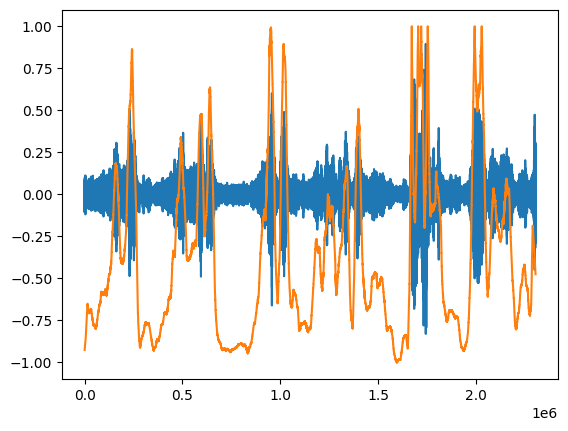

In [51]:
plt.plot(data[:, 0])
plt.plot(lfo_movingAvg) 

In [75]:
window_length = len(lfo_movingAvg)
window = hann(window_length, sym =False)

window2 = hamming(window_length, sym =False)
window3 = blackman(window_length, sym =False)
window4 = gaussian(window_length, std =0.3)



windowedLFO_hann = lfo_movingAvg * window
windowedLFO_hamming = lfo_movingAvg * window2
windowedLFO_blackman = lfo_movingAvg * window3
windowedLFO_gaussian = lfo_movingAvg * window4


/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_51984/757770703.py:2: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  window = hann(window_length, sym =False)
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_51984/757770703.py:4: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window2 = hamming(window_length, sym =False)
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_51984/757770703.py:5: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  window3 = black

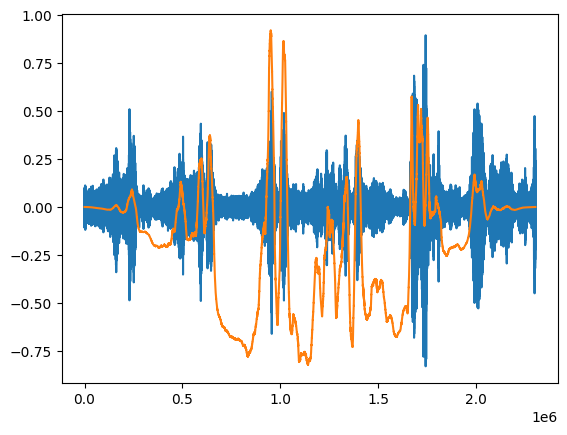

In [81]:
plt.plot(data[:, 0])
plt.plot(windowedLFO_hann) 
#plt.plot(windowedLFO_hamming) 
#plt.plot(windowedLFO_blackman) 
#plt.plot(windowedLFO_gaussian) 

In [83]:
lfo_signal_scaled = (lfo_movingAvg * 32767).astype(np.int16)

# Define the output file name and sample rate
output_file = 'Birds_lfo_waveform_noWindow.wav'
sample_rate = fs  # Adjust as needed

# Save the LFO waveform as a WAV file
wavfile.write(output_file, sample_rate, lfo_signal_scaled)